In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown, Latex

def print_markdown(x):
    display(Markdown(x))

from sklearn.linear_model import LinearRegression
import os

In [3]:
import plotly.graph_objects as go

In [101]:
from statsmodels.tsa.stattools import adfuller

#  Data preprocessing

In [4]:
xls = pd.ExcelFile('cac40.xls')

In [5]:
xls.sheet_names

['Poids', 'Données quotidiennes', 'Données Bloomberg']

## Components' weigthts

In [186]:
df = [pd.read_excel(xls,(xls.sheet_names)[i]) for i in range(3)]

In [187]:
df_weight = df[0].iloc[:,[0,2]]

## Stocks' price data

In [8]:
display(Markdown("**Columns who have null values**: "+str(((df[1].columns)[(df[1]).isnull().any()]).values)))

**Columns who have null values**: ['Credit Agricole SA' 'Electricite de France' 'Gaz de France SA' 'Suez SA']

In [193]:
print_markdown ("**Number of null data for each stock**:")
np.sum((df[1].loc[:,df[1].columns[(df[1].isnull().any())]]).isnull())

**Number of null data for each stock**:

Credit Agricole SA        247
Electricite de France    1273
Gaz de France SA         1177
Suez SA                  1970
dtype: int64

- Totall we have 2396 days' data, we need to delete these stocks who have null data and redefine a new index

In [194]:
df_price = (df[1].dropna(axis=1)).set_index("Date")

In [195]:
len(df_price.index)

2396

In [196]:
2396-np.sum((df[1].loc[:,df[1].columns[(df[1].isnull().any())]]).isnull())

Credit Agricole SA       2149
Electricite de France    1123
Gaz de France SA         1219
Suez SA                   426
dtype: int64

## BBG data

In [197]:
df3=pd.read_excel(xls,(xls.sheet_names)[2],header=[0,1])

In [198]:
%%capture
df4= df3.xs("PX_LAST",axis = 1, level = 1)
df4["Date"]= df3["CAC Index"]["Date"]
df4["Date"][0]=pd.Timestamp('2001-01-01')

cols = df4.columns.to_list()
cols = cols[-1:] + cols[:-1]

df4=df4[cols]

In [199]:
display(Markdown("**Columns who have null values**: "+str(((df4.columns)[(df4).isnull().any()]).values)))

**Columns who have null values**: ['ACA FP Equity' 'EDF FP Equity' 'GSZ FP Equity' 'SEV FP Equity']

In [200]:
print_markdown ("**Number of null data for each stock**:")
np.sum((df4.loc[:,df4.columns[(df4.isnull().any())]]).isnull())

**Number of null data for each stock**:

ACA FP Equity     248
EDF FP Equity    1274
GSZ FP Equity    1178
SEV FP Equity    1971
dtype: int64

In [201]:
df_bbg = df4.set_index("Date")

In [202]:
len(df_bbg.columns)

42

In [203]:
len(df_price.columns)

37

In [204]:
set(df_bbg.columns).intersection(set(df_price.columns))

set()

In [205]:
df_price.columns

Index(['CAC 40', 'Accor SA', 'Air Liquide', 'Alcatel-Lucent', 'Alstom',
       'Arcelor Mittal', 'AXA SA', 'BNP Paribas', 'Bouygues', 'Cap Gemini SA',
       'Carrefour SA', 'Groupe Danone', 'Dexia SA', 'EADS',
       'Essilor International SA', 'France Telecom SA', 'L'Oreal SA',
       'Lafarge SA', 'Lagardere SCA', 'LVMH Moet Hennessy Louis Vuitton SA',
       'Michelin', 'Pernod-Ricard SA', 'Peugeot SA', 'PPR', 'Renault SA',
       'Cie de Saint-Gobain', 'Sanofi-Aventis SA', 'Schneider Electric SA',
       'Societe Generale', 'STMicroelectronics NV', 'Total SA',
       'Unibail-Rodamco', 'Vallourec', 'Veolia Environnement', 'Vinci SA',
       'Vivendi', 'Tecnip'],
      dtype='object')

In [206]:
df_weight.to_csv("data/weights.csv")
df_price.to_csv("data/daily_price.csv")
df_bbg.to_csv("data/bbg_price.csv")

In [207]:
s='Accor SA'

In [208]:
np.sort(df_price.columns.values[1:])

array(['AXA SA', 'Accor SA', 'Air Liquide', 'Alcatel-Lucent', 'Alstom',
       'Arcelor Mittal', 'BNP Paribas', 'Bouygues', 'Cap Gemini SA',
       'Carrefour SA', 'Cie de Saint-Gobain', 'Dexia SA', 'EADS',
       'Essilor International SA', 'France Telecom SA', 'Groupe Danone',
       "L'Oreal SA", 'LVMH Moet Hennessy Louis Vuitton SA', 'Lafarge SA',
       'Lagardere SCA', 'Michelin', 'PPR', 'Pernod-Ricard SA',
       'Peugeot SA', 'Renault SA', 'STMicroelectronics NV',
       'Sanofi-Aventis SA', 'Schneider Electric SA', 'Societe Generale',
       'Tecnip', 'Total SA', 'Unibail-Rodamco', 'Vallourec',
       'Veolia Environnement', 'Vinci SA', 'Vivendi'], dtype=object)

In [209]:
dictPrice={}
for x in df_price.columns.values[1:]:
    dictPrice[x]=x

In [210]:
dictPrice["Cie de Saint-Gobain"]="Saint-Gobain";
dictPrice["Groupe Danone"] = "Danone";
dictPrice["Societe Generale"]="Societe-Generale";
dictPrice["Tecnip"]="Technip";

In [211]:
for x in dictPrice.keys():
    name = dictPrice[x]
    dictPrice[x]=name.split(" ")[0]

In [212]:
len([x.split(" ")[0] for x in dictPrice.values()])

36

In [213]:
dictPoid={}
for x in df_weight.Valeurs:
    dictPoid[x]=x

In [214]:
dictPoid["Alcatel-Lucent/France"]="Alcatel-Lucent";
dictPoid["ArcelorMittal"]="Arcelor Mittal";
dictPoid["Cie Generale des Etablissements Michelin"]="Michelin";
dictPoid["Compagnie de St-Gobain"]="Saint-Gobain";
dictPoid["Societe Generale"]="Societe-Generale";

In [215]:
for x in dictPoid.keys():
    name = dictPoid[x]
    dictPoid[x]=name.split(" ")[0]

In [216]:
for x in dictPrice.values():
    if not x in dictPoid.values():
        print(x)

In [217]:
df_weight["sym"]=df_weight["Valeurs"].apply(lambda x:dictPoid[x])

In [218]:
df_price= df_price.rename(columns=dictPrice)

In [219]:
df_weight.to_csv("data/weights.csv")
df_price.to_csv("data/daily_price.csv")

In [220]:
df_weight.columns=["Old_name","wgt",'sym']

In [221]:
for x in df_price.columns.values[1:]:
    if not x in df_weight.sym.values:
        print(x)

In [222]:
px_tab = pd.melt(df_price.reset_index(),id_vars=["Date"], value_vars=df_price.columns.values,var_name='sym', value_name='price')

## Change the remaining stocks' weights sum to be 1

In [225]:
df_price.columns.values

array(['CAC 40', 'Accor', 'Air', 'Alcatel-Lucent', 'Alstom', 'Arcelor',
       'AXA', 'BNP', 'Bouygues', 'Cap', 'Carrefour', 'Danone', 'Dexia',
       'EADS', 'Essilor', 'France', "L'Oreal", 'Lafarge', 'Lagardere',
       'LVMH', 'Michelin', 'Pernod-Ricard', 'Peugeot', 'PPR', 'Renault',
       'Saint-Gobain', 'Sanofi-Aventis', 'Schneider', 'Societe-Generale',
       'STMicroelectronics', 'Total', 'Unibail-Rodamco', 'Vallourec',
       'Veolia', 'Vinci', 'Vivendi', 'Technip'], dtype=object)

In [226]:
df_weight["to_use"]=df_weight["sym"].apply(lambda x: x in df_price.columns.values)

In [227]:
df=px_tab[px_tab.sym!="CAC 40"].set_index("sym").join(df_weight[["sym","wgt"]].set_index("sym")).reset_index()

In [228]:
tmp=df.assign(wPrice=df.price*df.wgt).groupby("Date")[["wPrice"]].sum()*100

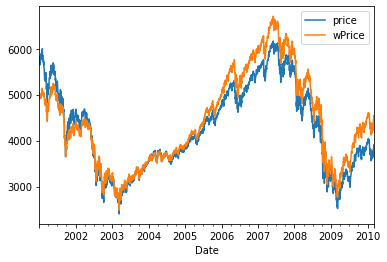

In [229]:
px_tab[px_tab.sym=="CAC 40"][["Date","price"]].set_index("Date").join(tmp).plot()

In [230]:
# Create traces
fig = go.Figure()
tmp= df_price[["CAC 40"]].reset_index();

fig.add_trace(go.Scatter(x=tmp.Date, y=tmp["CAC 40"],
                    mode='lines',
                    name='lines'))
fig.show()

In [306]:
df_sum_wgt = df.set_index("Date").groupby("Date").apply(lambda it: np.sum(it.price*it.wgt)).to_frame(name="price")

In [307]:
df_sum_wgt["36 stocks' return"] = df_sum_wgt[["price"]].apply(lambda x: (x-x[0])/x[0])

In [308]:
df_sum_wgt

,price,36 stocks' return
Date,,
2001-01-02,50.386509,0.000000
2001-01-03,49.861697,-0.010416
2001-01-04,50.228172,-0.003142
2001-01-05,49.766247,-0.012310
2001-01-08,49.672361,-0.014173
...,...,...
2010-03-03,44.679658,-0.113261
2010-03-04,44.564703,-0.115543
2010-03-05,45.514635,-0.096690


In [310]:
df40 = df_price[["CAC 40"]]

In [312]:
df40 ["CAC40' return"] = df40 [["CAC 40"]].apply(lambda x: (x-x[0])/x[0])

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



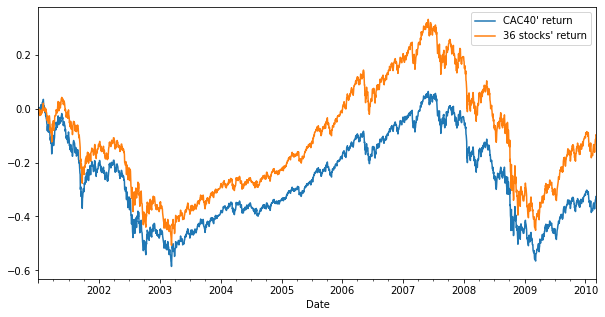

In [322]:
_,ax = plt.subplots(figsize=(10,5))
df40[["CAC40\' return"]].plot(ax=ax)
df_sum_wgt[["36 stocks' return"]].plot(ax=ax)
plt.savefig("fig/cac40_cum_return.png")

In [330]:
?df40.plot

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



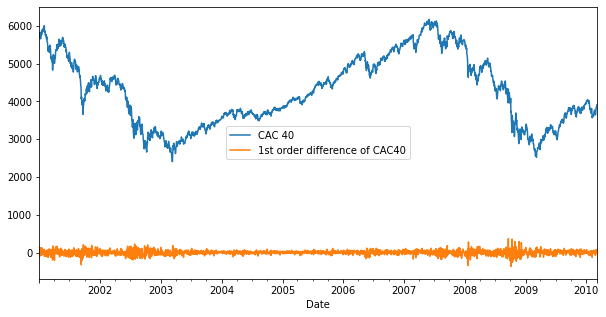

In [331]:
_,ax = plt.subplots(figsize=(10,5))
df40[["CAC 40"]].plot(ax=ax)
df40["1st order difference of CAC40"]=df40[["CAC 40"]].diff(1)
df40[["1st order difference of CAC40"]].plot(ax=ax)
plt.savefig("fig/cac40.png")

In [333]:
adfuller(df40[["CAC 40"]])

(-2.054492608961529,
 0.2632024154300224,
 18,
 2377,
 {'1%': -3.433104049600873,
  '5%': -2.862756696812544,
  '10%': -2.5674176995127014},
 26127.81208540479)

In [339]:
adfuller(df40["1st order difference of CAC40"].dropna())

(-11.048515005647067,
 5.150014158587248e-20,
 17,
 2377,
 {'1%': -3.433104049600873,
  '5%': -2.862756696812544,
  '10%': -2.5674176995127014},
 26118.185471988567)

# Portfolio Construction

We want to rebalance our portfolio every 10 days, in the first day of these ten days, we need to select the stocks to build the portfolio according to the previous trading day's close price. Then do the regression over the historical date between the select stocks' price and the index. Then we will have the weights in these ten days.
So our tasks are in two steps:
1. Every ten days select the stocks' universe accoding to the previous days' close price
2. Do the regression in the historical data

In [112]:
def index_tracking(data,nStocks,CalibYear):
    df_reb=pd.DataFrame({"Date":data["Date"].unique()})
    df_reb["rebalance"]=df_reb.assign(i=df_reb.index.values)['i'].apply(lambda x: x%10==4)
    df_reb.loc[df_reb.Date<pd.to_datetime("2005-01-01"),"rebalance"] = False
    df_reb["prev_Date"]=df_reb.Date.shift(1)
    data = data.set_index("Date").join(df_reb.set_index("Date")).reset_index()
    data["selected"]=False
    data["OLS_Coef"]=0
    df_cac40 = df_price["CAC 40"].reset_index()
    for name,group in data[data.rebalance].groupby("Date"):
        print(name)
        tmp=data[data.Date==(group.prev_Date.values[0])]
        tmp["w_P"] = tmp.price*tmp.wgt
        sym_selected = tmp.sort_values("w_P",ascending=False)["sym"][:nStocks].values;
        next_reb = (np.min(data[(data.rebalance)&(data.Date>name)]["Date"]));
        if pd.isna(next_reb):
            data.loc[(data.Date>=name)&(data.sym.apply(lambda x: x in sym_selected)),"selected"]=True
        else:
            data.loc[(data.Date>=name)&(data.Date<next_reb)&(data.sym.apply(lambda x: x in sym_selected)),"selected"]=True
    
    for name,group in data[data.rebalance].groupby("Date"):
        print(str(name))
        sym_selected= group[group.selected]['sym'].values
        train_x=data[data.Date.between(pd.to_datetime(pd.date_range(end=name, periods=CalibYear+1, freq=pd.DateOffset(years=1))[0]),name)&(data.sym.apply(lambda x: x in sym_selected))]
        train_x=train_x[["Date","sym","price"]].pivot(index="Date",values="price",columns="sym")
        X =np.log(train_x.values)
        y = np.log(0.01*df_cac40[df_cac40.Date.between(pd.to_datetime(pd.date_range(end=name, periods=CalibYear+1, freq=pd.DateOffset(years=1))[0]),name)]["CAC 40"].values)
        reg = LinearRegression().fit(X, y)
        residual = y-reg.predict(X)
        adf_test = adfuller(residual)
        adf = adf_test[0]
        adf_cV = adf_test[4]['1%']
        reg_coeff={}
        for i,sym in enumerate(train_x.columns.values):
            reg_coeff[sym]= reg.coef_[i]
        next_reb = (np.min(data[(data.rebalance)&(data.Date>name)]["Date"]));
        if pd.isna(next_reb):
            for sym in reg_coeff:
                data.loc[(data.Date>=name)&(data.sym==sym),"OLS_Coef"]=reg_coeff[sym]
            data.loc[(data.Date>=name),"ADF"]=adf
            data.loc[(data.Date>=name),"1%Critical"]=adf_cV
        else:
            for sym in reg_coeff:
                data.loc[(data.Date>=name)&(data.Date<next_reb)&(data.sym==sym),"OLS_Coef"]=reg_coeff[sym]
            data.loc[(data.Date>=name)&(data.Date<next_reb),"ADF"]=adf
            data.loc[(data.Date>=name)&(data.Date<next_reb),"1%Critical"]=adf_cV
    data["OLS_Coef"]=data.OLS_Coef.fillna(0.)
    data["stocks_wgt"]=data.groupby("Date")['OLS_Coef'].transform(lambda x: x/x.sum()).fillna(0.)
    return data


def construct_pf(res):
    res_PF=res[(res.Date>=np.min(res[res.rebalance].Date))&(res.rebalance)].reset_index(drop=True)
    res_pl = pd.DataFrame({"Date": res_PF.Date.unique()})
    res_pl["pos"]=0
    res_pl["trd"]=0
    res_pl["prev_reb"] = pd.to_datetime(res_pl.Date.shift(1))
    res_pl.loc[res_pl.Date==np.min(res_pl.Date),"pos"]=100
    res_pl.loc[res_pl.Date==np.min(res_pl.Date),"trd"]=100
    for day in res_pl.Date[1:]:
        print(day)
        prev_day= pd.to_datetime(res_pl[res_pl.Date==day]["prev_reb"].values[0])
        pos0 = res_pl[res_pl.Date==prev_day]["pos"].values[0]
        print("OK")
        prev_tab = res_PF[(res_PF.Date==prev_day)][["sym","price","stocks_wgt"]]
        act_tab = res_PF[(res_PF.Date==day)][["sym","price","stocks_wgt"]]
        prev_tab.columns=["sym","price0","stocks_wgt0"]
        tab = act_tab.set_index("sym").join(prev_tab.set_index("sym"))
        pos= np.sum(tab.price/tab.price0*tab.stocks_wgt0*pos0)
        trd = pos*np.sum(np.abs(tab.stocks_wgt-tab.stocks_wgt0))
        res_pl.loc[res_pl.Date==day,"pos"]=pos
        res_pl.loc[res_pl.Date==day,"trd"]=trd
        
    res_tmp = res[(res.Date>=np.min(res[res.rebalance].Date))].set_index("Date").join(res_pl.set_index("Date").drop(columns=["prev_reb"]))

    res_tmp["trd"].fillna(0.,inplace=True)

    res_tmp.reset_index(inplace=True)
    res_tmp["reb_Dt"]=res_tmp.apply(lambda x: x["Date"] if x.rebalance else pd.NA,axis=1)

    res_tmp["reb_Dt"]=res_tmp.groupby("sym")["reb_Dt"].ffill()

    for day in res_tmp[~res_tmp.rebalance].Date.unique():
        print(day)
        reb_day= pd.to_datetime(res_tmp[res_tmp.Date==day]["reb_Dt"].values[0])
        pos0 = res_tmp[res_tmp.Date==reb_day]["pos"].values[0]
        print("OK")
        reb_tab = res_tmp[(res_tmp.Date==reb_day)][["sym","price","stocks_wgt"]]
        act_tab = res_tmp[(res_tmp.Date==day)][["sym","price","stocks_wgt"]]
        reb_tab.columns=["sym","price0","stocks_wgt0"]
        tab = act_tab.set_index("sym").join(reb_tab.set_index("sym"))
        pos= np.sum(tab.price/tab.price0*tab.stocks_wgt0*pos0)
        trd = pos*np.sum(np.abs(tab.stocks_wgt-tab.stocks_wgt0))
        res_tmp.loc[res_tmp.Date==day,"pos"]=pos

    res_tmp["pos"]= res_tmp["pos"]*res_tmp["stocks_wgt"]
    res_tmp["trd"]= res_tmp["trd"]*res_tmp["stocks_wgt"]
    
    return res_tmp

In [113]:
data= df

In [118]:
%%capture
res=index_tracking(data,10,3)
tmp = construct_pf(res)

res_sum = tmp.groupby("Date")[["pos"]].sum()

res_sum["return"] = res_sum.pos/100-1

df_cac40 = df_price["CAC 40"].reset_index()
df_cac40 = df_cac40[df_cac40.Date>"2005-01-01"].reset_index(drop=True)

df_cac40["cac40_rtn"] = df_cac40[["CAC 40"]].apply(lambda x: (x-x[0])/x[0])

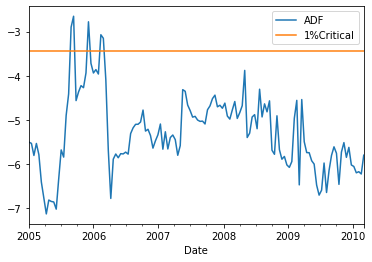

In [119]:
res[res.rebalance].groupby("Date")[["ADF","1%Critical"]].first().plot()

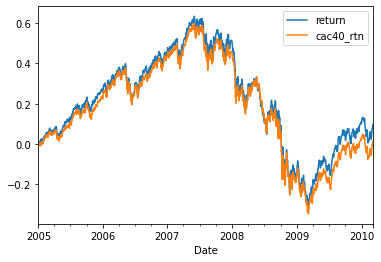

In [116]:
_,ax = plt.subplots()
res_sum[["return"]].plot(ax=ax)
df_cac40.set_index("Date")[["cac40_rtn"]].plot(ax=ax)

In [92]:
%%capture
res2=index_tracking(data,20,4)
tmp2 = construct_pf(res)

res_sum = tmp2.groupby("Date")[["pos"]].sum()

res_sum["return"] = res_sum.pos/100-1

df_cac40 = df_price["CAC 40"].reset_index()
df_cac40 = df_cac40[df_cac40.Date>"2005-01-01"].reset_index(drop=True)

df_cac40["cac40_rtn"] = df_cac40[["CAC 40"]].apply(lambda x: (x-x[0])/x[0])

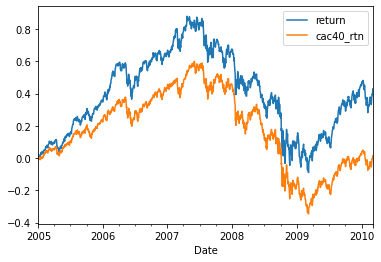

In [93]:
_,ax = plt.subplots()
res_sum[["return"]].plot(ax=ax)
df_cac40.set_index("Date")[["cac40_rtn"]].plot(ax=ax)

In [94]:
np.sort(res2[res2.OLS_Coef<0]["OLS_Coef"])

array([-7.34274187e-02, -7.34274187e-02, -7.34274187e-02, ...,
       -1.85150284e-05, -1.85150284e-05, -1.85150284e-05])

In [95]:
res_sum=tmp.groupby("Date")[["pos","trd"]].sum()
res_sum["pnl"]=(res_sum["pos"].diff(1).fillna(0)-res_sum.trd*0.002)

In [96]:
res_sum2=tmp2.groupby("Date")[["pos","trd"]].sum()
res_sum2["pnl2"]=(res_sum2["pos"].diff(1).fillna(0)-res_sum.trd*0.002)

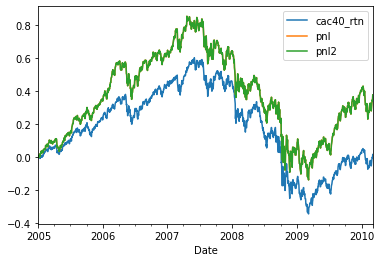

In [100]:
_,ax = plt.subplots()
#res_sum[["return"]].plot(ax=ax)
df_cac40.set_index("Date")[["cac40_rtn"]].plot(ax=ax)
(res_sum[["pnl"]].cumsum()/100).plot(ax=ax)
(res_sum2[["pnl2"]].cumsum()/100).plot(ax=ax)

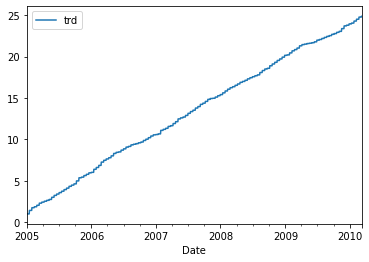

In [67]:
(res_sum[["trd"]]*0.01).cumsum().plot()

In [120]:
nS=[10,20,30]
nY=[1,2,3,5]

In [158]:
index_res = []
pf_res = []
data= df
for s in nS:
    tmp_index = []
    tmp_pf = []
    for y in nY:
        index = index_tracking(data,s,y)
        tmp_index.append(index)
        pf = construct_pf(index)
        tmp_pf.append(pf)
    index_res.append(tmp_index)
    pf_res.append(tmp_pf)

2005-01-03 00:00:00


/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:

2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30T00:00:00.000000000
OK
2006-03-31T00:00:00.000000000
OK
2006-04-03T00:00:00.000000000
OK
2006-04-04

2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04

OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06

2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005

2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30

OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10T00:00:00.000000000
OK
2007-05-11T00:00:00.000000000
OK
2007-05

OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06

2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-09-07 00:00:00
OK
2009-09-21 00:00:00
OK
2009-10-05 00:00:00
OK
2009-10-19 00:00:00
OK
2009-11-02 00:00:00
OK
2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:0

2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29

2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04

2008-04-28T00:00:00.000000000
OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12

2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2

2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28

2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03

2008-04-16T00:00:00.000000000
OK
2008-04-17T00:00:00.000000000
OK
2008-04-18T00:00:00.000000000
OK
2008-04-22T00:00:00.000000000
OK
2008-04-23T00:00:00.000000000
OK
2008-04-24T00:00:00.000000000
OK
2008-04-25T00:00:00.000000000
OK
2008-04-28T00:00:00.000000000
OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03

2009-05-12T00:00:00.000000000
OK
2009-05-13T00:00:00.000000000
OK
2009-05-14T00:00:00.000000000
OK
2009-05-15T00:00:00.000000000
OK
2009-05-19T00:00:00.000000000
OK
2009-05-20T00:00:00.000000000
OK
2009-05-21T00:00:00.000000000
OK
2009-05-22T00:00:00.000000000
OK
2009-05-25T00:00:00.000000000
OK
2009-05-26T00:00:00.000000000
OK
2009-05-27T00:00:00.000000000
OK
2009-05-28T00:00:00.000000000
OK
2009-05-29T00:00:00.000000000
OK
2009-06-02T00:00:00.000000000
OK
2009-06-03T00:00:00.000000000
OK
2009-06-04T00:00:00.000000000
OK
2009-06-05T00:00:00.000000000
OK
2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2

OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30T00:00:00.000000000
OK
2006-03

2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10T00:00:00.000000000
OK
2007-05-11T00:00:00.000000000
OK
2007-05-14T00:00:00.000000000
OK
2007-05-15

OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06

2009-06-04T00:00:00.000000000
OK
2009-06-05T00:00:00.000000000
OK
2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-10-05 00:00:00
OK
2009-10-19 00:00:00
OK
2009-11-02 00:00:00
OK
2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
O

2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22

2007-02-28T00:00:00.000000000
OK
2007-03-01T00:00:00.000000000
OK
2007-03-02T00:00:00.000000000
OK
2007-03-05T00:00:00.000000000
OK
2007-03-06T00:00:00.000000000
OK
2007-03-07T00:00:00.000000000
OK
2007-03-08T00:00:00.000000000
OK
2007-03-09T00:00:00.000000000
OK
2007-03-13T00:00:00.000000000
OK
2007-03-14T00:00:00.000000000
OK
2007-03-15T00:00:00.000000000
OK
2007-03-16T00:00:00.000000000
OK
2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16

2008-03-20T00:00:00.000000000
OK
2008-03-21T00:00:00.000000000
OK
2008-03-25T00:00:00.000000000
OK
2008-03-26T00:00:00.000000000
OK
2008-03-27T00:00:00.000000000
OK
2008-03-28T00:00:00.000000000
OK
2008-03-31T00:00:00.000000000
OK
2008-04-01T00:00:00.000000000
OK
2008-04-02T00:00:00.000000000
OK
2008-04-03T00:00:00.000000000
OK
2008-04-04T00:00:00.000000000
OK
2008-04-08T00:00:00.000000000
OK
2008-04-09T00:00:00.000000000
OK
2008-04-10T00:00:00.000000000
OK
2008-04-11T00:00:00.000000000
OK
2008-04-14T00:00:00.000000000
OK
2008-04-15T00:00:00.000000000
OK
2008-04-16T00:00:00.000000000
OK
2008-04-17T00:00:00.000000000
OK
2008-04-18T00:00:00.000000000
OK
2008-04-22T00:00:00.000000000
OK
2008-04-23T00:00:00.000000000
OK
2008-04-24T00:00:00.000000000
OK
2008-04-25T00:00:00.000000000
OK
2008-04-28T00:00:00.000000000
OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07

2009-04-22T00:00:00.000000000
OK
2009-04-23T00:00:00.000000000
OK
2009-04-24T00:00:00.000000000
OK
2009-04-27T00:00:00.000000000
OK
2009-04-28T00:00:00.000000000
OK
2009-04-29T00:00:00.000000000
OK
2009-04-30T00:00:00.000000000
OK
2009-05-01T00:00:00.000000000
OK
2009-05-05T00:00:00.000000000
OK
2009-05-06T00:00:00.000000000
OK
2009-05-07T00:00:00.000000000
OK
2009-05-08T00:00:00.000000000
OK
2009-05-11T00:00:00.000000000
OK
2009-05-12T00:00:00.000000000
OK
2009-05-13T00:00:00.000000000
OK
2009-05-14T00:00:00.000000000
OK
2009-05-15T00:00:00.000000000
OK
2009-05-19T00:00:00.000000000
OK
2009-05-20T00:00:00.000000000
OK
2009-05-21T00:00:00.000000000
OK
2009-05-22T00:00:00.000000000
OK
2009-05-25T00:00:00.000000000
OK
2009-05-26T00:00:00.000000000
OK
2009-05-27T00:00:00.000000000
OK
2009-05-28T00:00:00.000000000
OK
2009-05-29T00:00:00.000000000
OK
2009-06-02T00:00:00.000000000
OK
2009-06-03T00:00:00.000000000
OK
2009-06-04T00:00:00.000000000
OK
2009-06-05T00:00:00.000000000
OK
2009-06-08

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005-02-11T00:00:00.000000000
OK
2005-02-15T00:00:00.000000000
OK
2005-02-16T00:00:00.000000000
OK
2005-02-17T00:00:00.000000000
OK
2005-02-18

2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30T00:00:00.000000000
OK
2006-03-31T00:00:00.000000000
OK
2006-04-03T00:00:00.000000000
OK
2006-04-04T00:00:00.000000000
OK
2006-04-05

2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10T00:00:00.000000000
OK
2007-05-11

2008-04-25T00:00:00.000000000
OK
2008-04-28T00:00:00.000000000
OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11

2009-06-03T00:00:00.000000000
OK
2009-06-04T00:00:00.000000000
OK
2009-06-05T00:00:00.000000000
OK
2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.0000

2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30

2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09

2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18

2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2

2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30

2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09

OK
2008-04-25T00:00:00.000000000
OK
2008-04-28T00:00:00.000000000
OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06

2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-10-19 00:00:00
OK
2009-11-02 00:00:00
OK
2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.0

2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30

2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09

2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17

2009-06-02T00:00:00.000000000
OK
2009-06-03T00:00:00.000000000
OK
2009-06-04T00:00:00.000000000
OK
2009-06-05T00:00:00.000000000
OK
2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2

2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09

2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04

2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27

OK
2009-06-05T00:00:00.000000000
OK
2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005-02-11T00:00:00.000000000
OK
2005-02-15T00:00:00.000000000
OK
2005-02-16T00:00:00.000000000
OK
2005-02-17T00:00:00.000000000
OK
2005-02-18

2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28

2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08

2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13

2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24

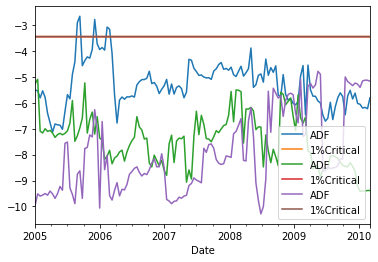

In [167]:
_,ax = plt.subplots()
pf_res[0][2][pf_res[0][1].rebalance].groupby("Date")[["ADF","1%Critical"]].first().plot(ax=ax)
pf_res[1][2][pf_res[0][1].rebalance].groupby("Date")[["ADF","1%Critical"]].first().plot(ax=ax)
pf_res[2][2][pf_res[0][1].rebalance].groupby("Date")[["ADF","1%Critical"]].first().plot(ax=ax)

In [174]:
!pwd

/Users/shancheng/Workspace/Cointegration_Alpha


In [177]:
index_res
for i,s in enumerate(nS):
    for j,y in enumerate(nY):
        name = "data/results/index_nS_"+str(s)+"_Y_"+str(y)+".csv"
        name_pf = "data/results/pf_nS_"+str(s)+"_Y_"+str(y)+".csv"
        index_res[i][j].to_csv(name)
        pf_res[i][j].to_csv(name_pf)

In [341]:
pf_res[0][1]

,Date,sym,price,wgt,rebalance,prev_Date,selected,OLS_Coef,ADF,1%Critical,stocks_wgt,pos,trd,reb_Dt
0,2005-01-03,AXA,18.0488,0.037955,True,2004-12-31,False,0.000000,-5.857421,-3.442964,0.000000,0.000000,0.000000,2005-01-03
1,2005-01-03,Accor,30.5729,0.007442,True,2004-12-31,False,0.000000,-5.857421,-3.442964,0.000000,0.000000,0.000000,2005-01-03
2,2005-01-03,Air,56.4050,0.033058,True,2004-12-31,True,-0.083782,-5.857421,-3.442964,-0.078719,-7.871857,-7.871857,2005-01-03
3,2005-01-03,Alcatel-Lucent,11.6200,0.007738,True,2004-12-31,False,0.000000,-5.857421,-3.442964,0.000000,0.000000,0.000000,2005-01-03
4,2005-01-03,Alstom,11.8000,0.014156,True,2004-12-31,False,0.000000,-5.857421,-3.442964,0.000000,0.000000,0.000000,2005-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48667,2010-03-09,Unibail-Rodamco,154.4000,0.019838,False,2010-03-08,True,0.015930,-6.555102,-3.443062,0.014703,2.059312,0.000000,2010-03-08
48668,2010-03-09,Vallourec,142.5000,0.010917,False,2010-03-08,False,0.000000,-6.555102,-3.443062,0.000000,0.000000,0.000000,2010-03-08
48669,2010-03-09,Veolia,23.5000,0.013867,False,2010-03-08,False,0.000000,-6.555102,-3.443062,0.000000,0.000000,0.000000,2010-03-08
48670,2010-03-09,Vinci,41.5950,0.025897,False,2010-03-08,False,0.000000,-6.555102,-3.443062,0.000000,0.000000,0.000000,2010-03-08


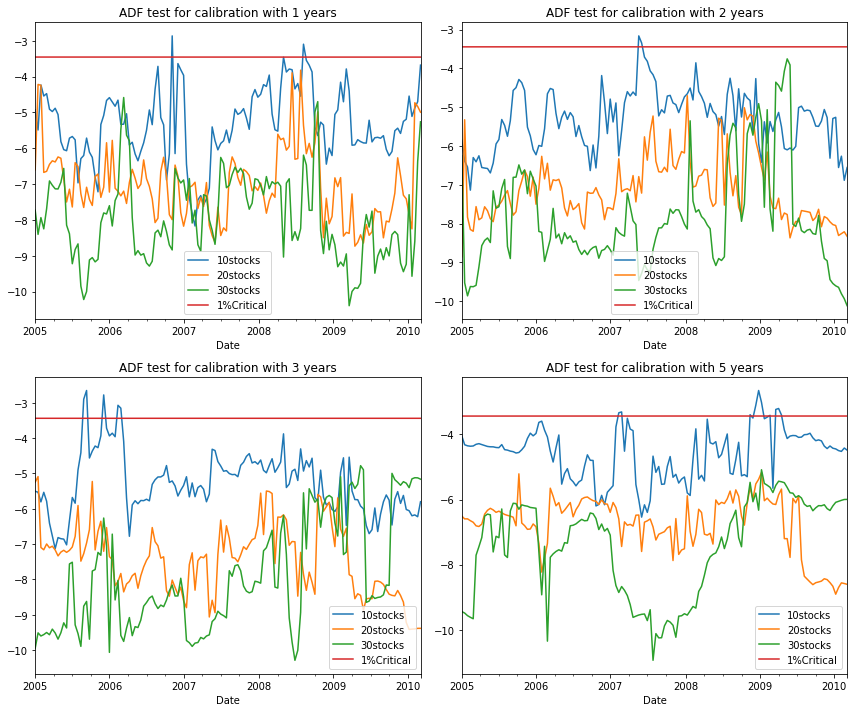

In [387]:
#_,ax = plt.subplots(figsize=(10,5))
fig,ax =  plt.subplots(2,2,figsize=(12,10))

for jyear in range(4):
    year = nY[jyear]
    ai = jyear//2
    aj = jyear%2
    for i in range(3):
        if i==2:
            pf_res[i][jyear][pf_res[0][1].rebalance].groupby("Date")[["ADF","1%Critical"]].first().rename(columns={"ADF":str(nS[i])+"stocks"}).plot(ax=ax[ai,aj])
        else: 
            pf_res[i][jyear][pf_res[0][1].rebalance].groupby("Date")[["ADF"]].first().rename(columns={"ADF":str(nS[i])+"stocks"}).plot(ax=ax[ai,aj])
    ax[ai,aj].set_title("ADF test for calibration with "+str(year)+" years");
    #plt.title("ADF test for calibration with "+str(year)+" years");
plt.tight_layout()
#pf_res[1][2][pf_res[0][1].rebalance].groupby("Date")[["ADF","1%Critical"]].first().plot(ax=ax)
#pf_res[2][2][pf_res[0][1].rebalance].groupby("Date")[["ADF","1%Critical"]].first().plot(ax=ax)
#plt.savefig("fig/ADF_test.png")

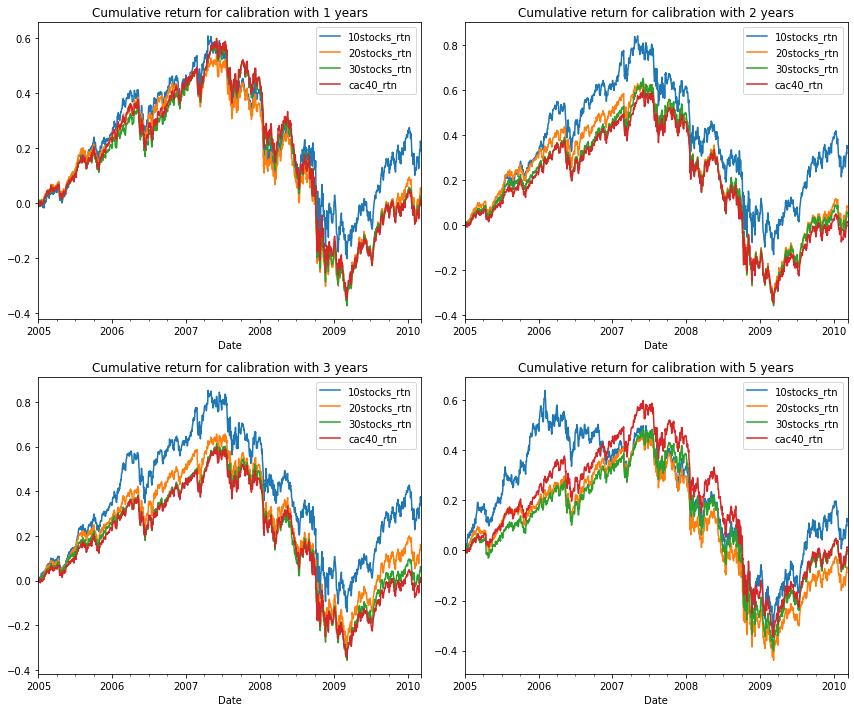

In [431]:
df_cac40 = df_price["CAC 40"].reset_index()
df_cac40 = df_cac40[df_cac40.Date>"2005-01-01"].reset_index(drop=True)
df_cac40["cac40_rtn"] = df_cac40[["CAC 40"]].apply(lambda x: (x-x[0])/x[0])
fig,ax =  plt.subplots(2,2,figsize=(12,10))
for jyear in range(4):
    year = nY[jyear]
    ai = jyear//2
    aj = jyear%2
    for i in range(3):
        res= index_res[i][jyear]
        tmp= pf_res[i][jyear]
        res_sum=tmp.groupby("Date")[["pos","trd"]].sum()
        res_sum["pnl"]=(res_sum["pos"].diff(1).fillna(0)-res_sum.trd*0.002)
        res_sum[str(nS[i])+"stocks_rtn"] = (res_sum[["pnl"]].cumsum()/100)
        res_sum[[str(nS[i])+"stocks_rtn"]].plot(ax=ax[ai,aj])
    df_cac40.set_index("Date")[["cac40_rtn"]].plot(ax=ax[ai,aj])

    ax[ai,aj].set_title("Cumulative return for calibration with "+str(year)+" years");
plt.tight_layout()
plt.savefig("fig/cum_rtn.png")

In [438]:
i =0 
jyear = 0
year = nY[jyear]
res= index_res[i][jyear]
tmp= pf_res[i][jyear]
res_sum=tmp.groupby("Date")[["pos","trd"]].sum()
res_sum["pnl"]=(res_sum["pos"].diff(1).fillna(0)-res_sum.trd*0.002)

In [459]:
?res_sum.plot

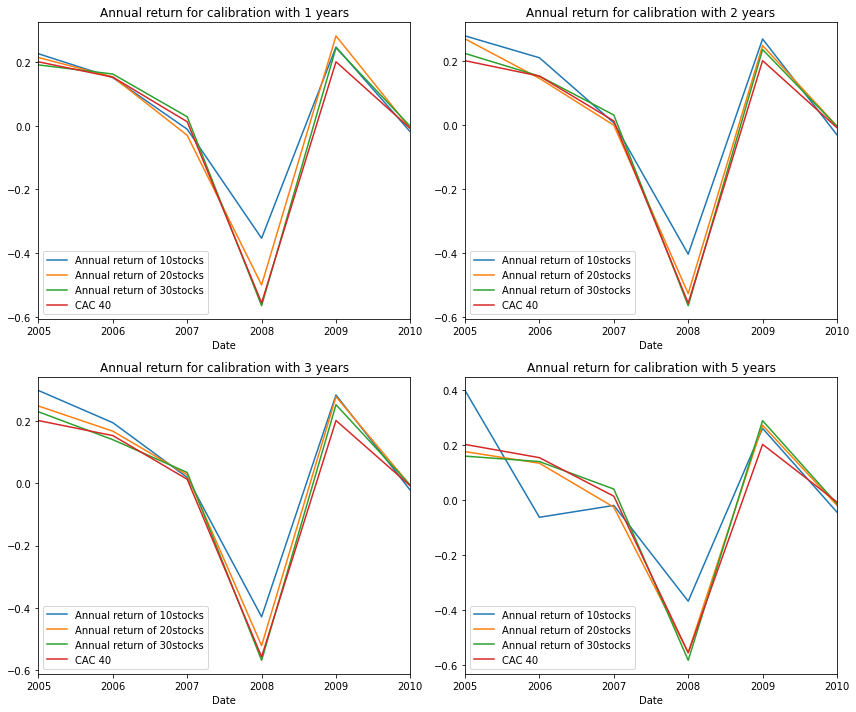

In [469]:
df_cac40 = df_price["CAC 40"].reset_index()
df_cac40 = df_cac40[df_cac40.Date>"2005-01-01"].reset_index(drop=True)
df_cac40["cac40_rtn"] = df_cac40[["CAC 40"]].apply(lambda x: (x-x[0])/x[0])
fig,ax =  plt.subplots(2,2,figsize=(12,10))
for jyear in range(4):
    year = nY[jyear]
    ai = jyear//2
    aj = jyear%2
    for i in range(3):
        res= index_res[i][jyear]
        tmp= pf_res[i][jyear]
        res_sum=tmp.groupby("Date")[["pos","trd"]].sum()
        (np.log(res_sum[["pos"]].resample("1y").last())-np.log(res_sum[["pos"]].resample("1y").first())).rename(columns={'pos':"Annual return of "+str(nS[i])+"stocks"}).plot(ax=ax[ai,aj])
    (np.log(df_cac40.set_index("Date")[["CAC 40"]].resample("1y").last())-np.log(df_cac40.set_index("Date")[["CAC 40"]].resample("1y").first())).plot(ax=ax[ai,aj])

    ax[ai,aj].set_title("Annual return for calibration with "+str(year)+" years");
plt.tight_layout()
plt.savefig("fig/annual_rtn.png")

In [92]:
%%capture
res2=index_tracking(data,20,4)
tmp2 = construct_pf(res)

res_sum = tmp2.groupby("Date")[["pos"]].sum()

res_sum["return"] = res_sum.pos/100-1

df_cac40 = df_price["CAC 40"].reset_index()
df_cac40 = df_cac40[df_cac40.Date>"2005-01-01"].reset_index(drop=True)

df_cac40["cac40_rtn"] = df_cac40[["CAC 40"]].apply(lambda x: (x-x[0])/x[0])

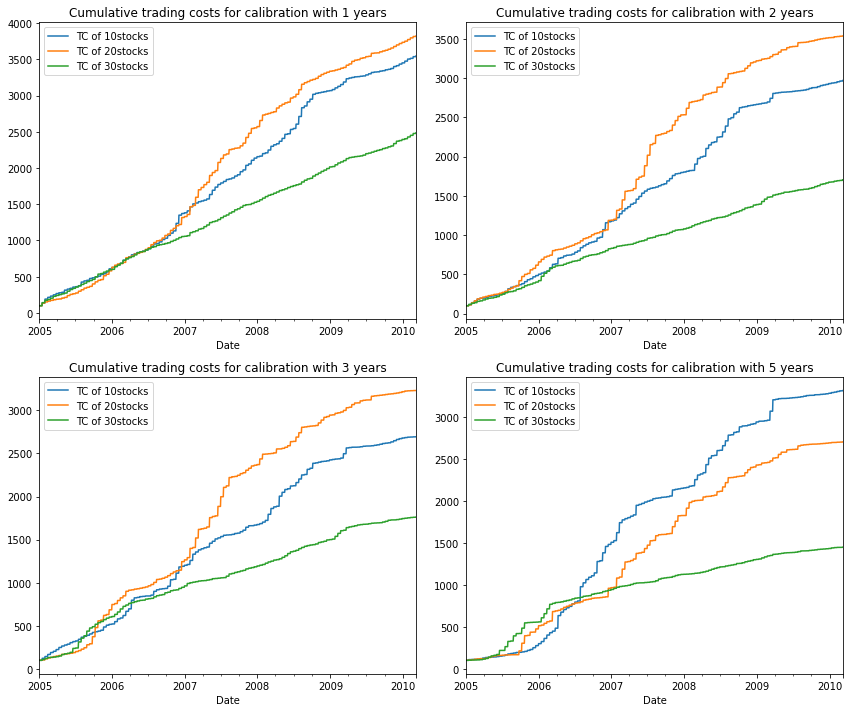

In [473]:
fig,ax =  plt.subplots(2,2,figsize=(12,10))
for jyear in range(4):
    year = nY[jyear]
    ai = jyear//2
    aj = jyear%2
    for i in range(3):
        res= index_res[i][jyear]
        tmp= pf_res[i][jyear]
        res_sum=tmp.groupby("Date")[["pos","trd"]].sum()
        #res_sum[str(nS[i])+"stocks_rtn"] = (res_sum[["pnl"]].cumsum()/100)
        res_sum[["trd"]].cumsum().rename(columns={"trd":"TC of "+str(nS[i])+"stocks"}).plot(ax=ax[ai,aj])

    ax[ai,aj].set_title("Cumulative trading costs for calibration with "+str(year)+" years");
plt.tight_layout()
plt.savefig("fig/cum_TC.png")

In [512]:
jyear=0
year = nY[jyear]
res_sr = df_cac40.set_index("Date").diff(1).fillna(0).rename(columns={"CAC 40":"IR_CAC40"})
res_sr = res_sr[["IR_CAC40"]].resample("1Y").mean()/res_sr[["IR_CAC40"]].resample("1y").std()
for i in range(3):
    res= index_res[i][jyear]
    tmp= pf_res[i][jyear]
    res_sum=tmp.groupby("Date")[["pos","trd"]].sum()
    res_sum["pnl"]=(res_sum["pos"].diff(1).fillna(0)-res_sum.trd*0.002)
    res_sr["IR_"+str(nS[i])+"stocks"]=res_sum[["pnl"]].resample("1Y").mean()/res_sum[["pnl"]].resample("1y").std()

In [513]:
res_sr.reset_index(inplace=True)
res_sr.Date=(res_sr.Date).apply(lambda x: x.year)
res_sr.set_index("Date")

,IR_CAC40,IR_10stocks,IR_20stocks,IR_30stocks
Date,,,,
2005,0.112855,0.113864,0.110997,0.097991
2006,0.069010,0.058516,0.061117,0.069235
2007,0.004637,-0.006882,-0.016375,0.007548
2008,-0.094624,-0.061005,-0.082268,-0.096805
2009,0.052695,0.063096,0.070688,0.061654
2010,-0.014207,-0.032892,-0.017006,-0.006331


In [481]:
df_cac40 = df_price["CAC 40"].reset_index()
df_cac40 = df_cac40[df_cac40.Date>"2005-01-01"].reset_index(drop=True)

In [487]:
res_sr = df_cac40.set_index("Date").diff(1).fillna(0).rename(columns={"CAC 40":"sr_CAC40"})
res_sr = res_sr[["sr_CAC40"]].resample("1Y").mean()/res_sr[["sr_CAC40"]].resample("1y").std()

In [488]:
res_sr

,sr_CAC40
Date,
2005-12-31,0.112855
2006-12-31,0.069010
2007-12-31,0.004637
2008-12-31,-0.094624
2009-12-31,0.052695
2010-12-31,-0.014207


In [516]:
df_cac40.set_index("Date").resample("1y").count()

,CAC 40
Date,
2005-12-31,260
2006-12-31,260
2007-12-31,261
2008-12-31,262
2009-12-31,261
2010-12-31,48


In [517]:
0.05/260

0.0001923076923076923

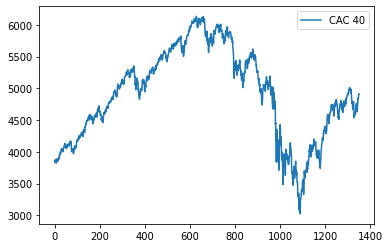

In [534]:
((1+np.cumsum((np.log(df_cac40[["CAC 40"]]).diff(1)+0.05/260).fillna(0)))*df_cac40["CAC 40"][0]).plot()

In [655]:
def generate_new_price(df,col,**dict_delta_annual):
    tmp_df = df.copy()
    #assert len(newcol)==len(delta_annual),"newcol and delta_annual should have the same length"
    for ncol in (dict_delta_annual):
        delta_day = dict_delta_annual[ncol]/260
        first_price = tmp_df[col][0]
        tmp_df[ncol]=(np.cumprod((np.log(tmp_df[[col]]).diff(1)+delta_day+1).fillna(1)))*first_price
    return tmp_df

In [656]:
dict_param={"plus_1%":0.01,"minus_1%":-0.01,"plus_2%":0.02,"minus_2%":-0.02,"plus_5%":0.05,"minus_5%":-0.05}

In [658]:
general_index = generate_new_price(df_price[["CAC 40"]],"CAC 40",**dict_param)

In [644]:
def index_tracking_general(data,nStocks,CalibYear,track_df,col):
    df_reb=pd.DataFrame({"Date":data["Date"].unique()})
    df_reb["rebalance"]=df_reb.assign(i=df_reb.index.values)['i'].apply(lambda x: x%10==4)
    df_reb.loc[df_reb.Date<pd.to_datetime("2005-01-01"),"rebalance"] = False
    df_reb["prev_Date"]=df_reb.Date.shift(1)
    data = data.set_index("Date").join(df_reb.set_index("Date")).reset_index()
    data["selected"]=False
    data["OLS_Coef"]=0
    df_track = track_df[[col]].reset_index()
    for name,group in data[data.rebalance].groupby("Date"):
        print(name)
        tmp=data[data.Date==(group.prev_Date.values[0])]
        tmp["w_P"] = tmp.price*tmp.wgt
        sym_selected = tmp.sort_values("w_P",ascending=False)["sym"][:nStocks].values;
        next_reb = (np.min(data[(data.rebalance)&(data.Date>name)]["Date"]));
        if pd.isna(next_reb):
            data.loc[(data.Date>=name)&(data.sym.apply(lambda x: x in sym_selected)),"selected"]=True
        else:
            data.loc[(data.Date>=name)&(data.Date<next_reb)&(data.sym.apply(lambda x: x in sym_selected)),"selected"]=True
    
    for name,group in data[data.rebalance].groupby("Date"):
        print(str(name))
        sym_selected= group[group.selected]['sym'].values
        train_x=data[data.Date.between(pd.to_datetime(pd.date_range(end=name, periods=CalibYear+1, freq=pd.DateOffset(years=1))[0]),name)&(data.sym.apply(lambda x: x in sym_selected))]
        train_x=train_x[["Date","sym","price"]].pivot(index="Date",values="price",columns="sym")
        X =np.log(train_x.values)
        y = np.log(0.01*df_track[df_track.Date.between(pd.to_datetime(pd.date_range(end=name, periods=CalibYear+1, freq=pd.DateOffset(years=1))[0]),name)][col].values)
        reg = LinearRegression().fit(X, y)
        residual = y-reg.predict(X)
        adf_test = adfuller(residual)
        adf = adf_test[0]
        adf_cV = adf_test[4]['1%']
        reg_coeff={}
        for i,sym in enumerate(train_x.columns.values):
            reg_coeff[sym]= reg.coef_[i]
        next_reb = (np.min(data[(data.rebalance)&(data.Date>name)]["Date"]));
        if pd.isna(next_reb):
            for sym in reg_coeff:
                data.loc[(data.Date>=name)&(data.sym==sym),"OLS_Coef"]=reg_coeff[sym]
            data.loc[(data.Date>=name),"ADF"]=adf
            data.loc[(data.Date>=name),"1%Critical"]=adf_cV
        else:
            for sym in reg_coeff:
                data.loc[(data.Date>=name)&(data.Date<next_reb)&(data.sym==sym),"OLS_Coef"]=reg_coeff[sym]
            data.loc[(data.Date>=name)&(data.Date<next_reb),"ADF"]=adf
            data.loc[(data.Date>=name)&(data.Date<next_reb),"1%Critical"]=adf_cV
    data["OLS_Coef"]=data.OLS_Coef.fillna(0.)
    data["stocks_wgt"]=data.groupby("Date")['OLS_Coef'].transform(lambda x: x/x.sum()).fillna(0.)
    return data


def construct_pf(res):
    res_PF=res[(res.Date>=np.min(res[res.rebalance].Date))&(res.rebalance)].reset_index(drop=True)
    res_pl = pd.DataFrame({"Date": res_PF.Date.unique()})
    res_pl["pos"]=0
    res_pl["trd"]=0
    res_pl["prev_reb"] = pd.to_datetime(res_pl.Date.shift(1))
    res_pl.loc[res_pl.Date==np.min(res_pl.Date),"pos"]=100
    res_pl.loc[res_pl.Date==np.min(res_pl.Date),"trd"]=100
    for day in res_pl.Date[1:]:
        print(day)
        prev_day= pd.to_datetime(res_pl[res_pl.Date==day]["prev_reb"].values[0])
        pos0 = res_pl[res_pl.Date==prev_day]["pos"].values[0]
        print("OK")
        prev_tab = res_PF[(res_PF.Date==prev_day)][["sym","price","stocks_wgt"]]
        act_tab = res_PF[(res_PF.Date==day)][["sym","price","stocks_wgt"]]
        prev_tab.columns=["sym","price0","stocks_wgt0"]
        tab = act_tab.set_index("sym").join(prev_tab.set_index("sym"))
        pos= np.sum(tab.price/tab.price0*tab.stocks_wgt0*pos0)
        trd = pos*np.sum(np.abs(tab.stocks_wgt-tab.stocks_wgt0))
        res_pl.loc[res_pl.Date==day,"pos"]=pos
        res_pl.loc[res_pl.Date==day,"trd"]=trd
        
    res_tmp = res[(res.Date>=np.min(res[res.rebalance].Date))].set_index("Date").join(res_pl.set_index("Date").drop(columns=["prev_reb"]))

    res_tmp["trd"].fillna(0.,inplace=True)

    res_tmp.reset_index(inplace=True)
    res_tmp["reb_Dt"]=res_tmp.apply(lambda x: x["Date"] if x.rebalance else pd.NA,axis=1)

    res_tmp["reb_Dt"]=res_tmp.groupby("sym")["reb_Dt"].ffill()

    for day in res_tmp[~res_tmp.rebalance].Date.unique():
        print(day)
        reb_day= pd.to_datetime(res_tmp[res_tmp.Date==day]["reb_Dt"].values[0])
        pos0 = res_tmp[res_tmp.Date==reb_day]["pos"].values[0]
        print("OK")
        reb_tab = res_tmp[(res_tmp.Date==reb_day)][["sym","price","stocks_wgt"]]
        act_tab = res_tmp[(res_tmp.Date==day)][["sym","price","stocks_wgt"]]
        reb_tab.columns=["sym","price0","stocks_wgt0"]
        tab = act_tab.set_index("sym").join(reb_tab.set_index("sym"))
        pos= np.sum(tab.price/tab.price0*tab.stocks_wgt0*pos0)
        trd = pos*np.sum(np.abs(tab.stocks_wgt-tab.stocks_wgt0))
        res_tmp.loc[res_tmp.Date==day,"pos"]=pos

    res_tmp["pos"]= res_tmp["pos"]*res_tmp["stocks_wgt"]
    res_tmp["trd"]= res_tmp["trd"]*res_tmp["stocks_wgt"]
    
    return res_tmp

In [794]:
general_index = generate_new_price(df_price[["CAC 40"]],"CAC 40",**dict_param)
res2=index_tracking_general(data,10,1,general_index,"plus_5%")
tmp2 = construct_pf(res2)

2005-01-03 00:00:00


/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005-02-11T00:00:00.0000000

OK
2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03

2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09

2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02T00:00:00.000000000
OK
2008-07-03T00:00:00.000000000
OK
2008-07-04T00:00:00.000000000
OK
2008-07-07

OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20T00:00:00.000000000
OK
2009-08-21T00:00:00.000000000
OK
2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09-01T00:00:00.000000000
OK
2009-09-02T00:00:00.000000000
OK
2009-09-03T00:00:00.000000000
OK
2009-09

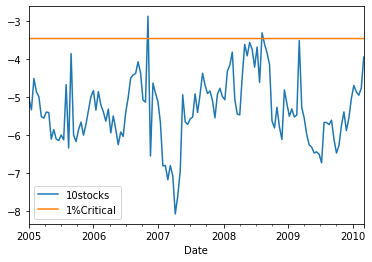

In [795]:
tmp2[tmp2.rebalance].groupby("Date")[["ADF","1%Critical"]].first().rename(columns={"ADF":str(10)+"stocks"}).plot()

In [902]:
# _,ax = plt.subplots()

# i=2
# col = "minus_1%"
# general_index.reset_index(inplace=True)
# res_sum=tmp.groupby("Date")[["pos","trd"]].sum()
# res_sum["pnl"]=(res_sum["pos"].diff(1).fillna(0)-res_sum.trd*0.002)
# res_sum[str(nS[i])+"stocks_rtn"] = (res_sum[["pnl"]].cumsum()/100)
# res_sum[[str(nS[i])+"stocks_rtn"]].plot(ax=ax)
# #df_cac40.set_index("Date")[["cac40_rtn"]].plot(ax=ax)

# col2 = "plus_1%"
# #general_index.reset_index(inplace=True)
# res_sum=tmp2.groupby("Date")[["pos","trd"]].sum()
# res_sum["pnl"]=(res_sum["pos"].diff(1).fillna(0)-res_sum.trd*0.002)
# res_sum[str(nS[i])+"stocks_rtn2"] = (res_sum[["pnl"]].cumsum()/100)
# res_sum[[str(nS[i])+"stocks_rtn2"]].plot(ax=ax)


# df1 = general_index.set_index("Date")[["CAC 40"]].reset_index()
# df1 = df1[df1.Date>"2005-01-01"].reset_index(drop=True)

# df1["cac40_rtn"] = df1[["CAC 40"]].apply(lambda x: (x-x[0])/x[0])

# #col = "plus_1%"
# df2 = general_index.set_index("Date")[[col]].reset_index()
# df2 = df2[df2.Date>"2005-01-01"].reset_index(drop=True)

# df2[col] = df2[[col]].apply(lambda x: (x-x[0])/x[0])


# df3 = general_index.set_index("Date")[[col2]].reset_index()
# df3 = df3[df3.Date>"2005-01-01"].reset_index(drop=True)

# df3[col2] = df3[[col2]].apply(lambda x: (x-x[0])/x[0])

# #_,ax = plt.subplots()
# #df1.set_index("Date")[["cac40_rtn"]].plot(ax=ax)
# #df2.set_index("Date")[[col]].plot(ax=ax)
# #df3.set_index("Date")[[col2]].plot(ax=ax)

In [682]:
tmp[["Date","sym","pos"]]

,Date,sym,pos
0,2005-01-03,AXA,5.560566
1,2005-01-03,Accor,-1.916540
2,2005-01-03,Air,5.149825
3,2005-01-03,Alcatel-Lucent,0.000000
4,2005-01-03,Alstom,0.000000
...,...,...,...
48667,2010-03-09,Unibail-Rodamco,1.319249
48668,2010-03-09,Vallourec,0.844342
48669,2010-03-09,Veolia,2.091134
48670,2010-03-09,Vinci,2.219873


In [683]:
tmp2[["Date","sym","pos"]]

,Date,sym,pos
0,2005-01-03,AXA,5.043967
1,2005-01-03,Accor,-1.868524
2,2005-01-03,Air,3.299878
3,2005-01-03,Alcatel-Lucent,0.000000
4,2005-01-03,Alstom,0.000000
...,...,...,...
48667,2010-03-09,Unibail-Rodamco,1.860553
48668,2010-03-09,Vallourec,1.276760
48669,2010-03-09,Veolia,2.473751
48670,2010-03-09,Vinci,2.615405


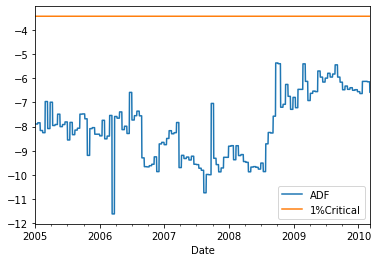

In [647]:
tmp.groupby("Date")[["ADF","1%Critical"]].first().plot()

In [660]:
general_index

,CAC 40,plus_1%,minus_1%,plus_2%,minus_2%,plus_5%,minus_5%
Date,,,,,,,
2001-01-02,5798.90,5798.900000,5798.900000,5798.900000,5798.900000,5798.900000,5798.900000
2001-01-03,5684.05,5683.120461,5682.674392,5683.343496,5682.451357,5684.012600,5681.782254
2001-01-04,5815.99,5813.749688,5812.856237,5814.196439,5812.409537,5815.536796,5811.069540
2001-01-05,5758.02,5755.734898,5754.403219,5756.400814,5753.737457,5758.398871,5751.740479
2001-01-08,5732.80,5730.690910,5728.922379,5731.575328,5728.038267,5734.229198,5725.386546
...,...,...,...,...,...,...,...
2010-03-03,3842.52,3142.348630,2614.232651,3445.141991,2384.442542,4540.003419,1809.278886
2010-03-04,3828.41,3130.909330,2604.514791,3432.732917,2375.487170,4524.174605,1802.274922
2010-03-05,3910.42,3197.390036,2659.617860,3505.754475,2425.653393,4620.935477,1840.127929


In [668]:
general_index

,level_0,index,Date,CAC 40,plus_1%,minus_1%,plus_2%,minus_2%,plus_5%,minus_5%
0,0,0,2001-01-02,5798.90,5798.900000,5798.900000,5798.900000,5798.900000,5798.900000,5798.900000
1,1,1,2001-01-03,5684.05,5683.120461,5682.674392,5683.343496,5682.451357,5684.012600,5681.782254
2,2,2,2001-01-04,5815.99,5813.749688,5812.856237,5814.196439,5812.409537,5815.536796,5811.069540
3,3,3,2001-01-05,5758.02,5755.734898,5754.403219,5756.400814,5753.737457,5758.398871,5751.740479
4,4,4,2001-01-08,5732.80,5730.690910,5728.922379,5731.575328,5728.038267,5734.229198,5725.386546
...,...,...,...,...,...,...,...,...,...,...
2391,2391,2391,2010-03-03,3842.52,3142.348630,2614.232651,3445.141991,2384.442542,4540.003419,1809.278886
2392,2392,2392,2010-03-04,3828.41,3130.909330,2604.514791,3432.732917,2375.487170,4524.174605,1802.274922
2393,2393,2393,2010-03-05,3910.42,3197.390036,2659.617860,3505.754475,2425.653393,4620.935477,1840.127929
2394,2394,2394,2010-03-08,3903.54,3191.882564,2654.832109,3499.850685,2421.195347,4613.686876,1836.533683


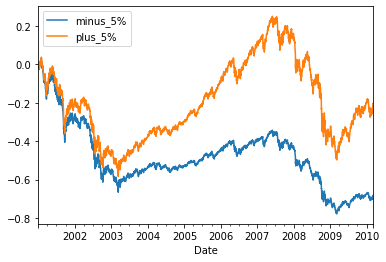

In [672]:
#general_index.reset_index(inplace=True)
col1 = "minus_5%"
df1 = general_index.set_index("Date")[[col1]].reset_index()
df1 = df1.reset_index(drop=True)

df1[col1] = df1[[col1]].apply(lambda x: (x-x[0])/x[0])

col = "plus_5%"
df2 = general_index.set_index("Date")[[col]].reset_index()
df2 = df2.reset_index(drop=True)

df2[col] = df2[[col]].apply(lambda x: (x-x[0])/x[0])

_,ax = plt.subplots()
df1.set_index("Date")[[col1]].plot(ax=ax)
df2.set_index("Date")[[col]].plot(ax=ax)

In [603]:
df1

,Date,CAC 40,cac40_rtn
0,2005-01-03,3855.68,0.000000
1,2005-01-04,3863.30,0.001976
2,2005-01-05,3829.36,-0.006826
3,2005-01-06,3856.48,0.000207
4,2005-01-07,3877.96,0.005778
...,...,...,...
1347,2010-03-03,3842.52,-0.003413
1348,2010-03-04,3828.41,-0.007073
1349,2010-03-05,3910.42,0.014197
1350,2010-03-08,3903.54,0.012413


In [687]:
dict_param

{'plus_1%': 0.01,
 'minus_1%': -0.01,
 'plus_2%': 0.02,
 'minus_2%': -0.02,
 'plus_5%': 0.05,
 'minus_5%': -0.05}

In [ ]:
general_index = generate_new_price(df_price[["CAC 40"]],"CAC 40",**dict_param)
res2=index_tracking_general(data,20,1,general_index,"plus_1%")
tmp2 = construct_pf(res2)

In [692]:
dict_param.keys()

dict_keys(['plus_1%', 'minus_1%', 'plus_2%', 'minus_2%', 'plus_5%', 'minus_5%'])

In [694]:
nS=[20,30]
general_index_res = []
general_pf_res = []
data= df
general_index = generate_new_price(df_price[["CAC 40"]],"CAC 40",**dict_param)
for s in nS:
    tmp_index = []
    tmp_pf = []
    y = 1
    for col in dict_param.keys():
        index = index_tracking_general(data,s,y,general_index,col)
        tmp_index.append(index)
        pf = construct_pf(index)
        tmp_pf.append(pf)
    general_index_res.append(tmp_index)
    general_pf_res.append(tmp_pf)

2005-01-03 00:00:00


/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.0000

OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30T00:00:00.000000000
OK
2006-03-31T00:00:00.000000000
OK
2006-04-03T00:00:00.000000000
OK
2006-04-04T00:00:00.000000000
OK
2006-04-05T00:00:00.000000000
OK
2006-04-06T00:00:00.000000000
OK
2006-04-07T00:00:00.000000000
OK
2006-04

2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10T00:00:00.000000000
OK
2007-05-11T00:00:00.000000000
OK
2007-05-14T00:00:00.000000000
OK
2007-05-15T00:00:00.000000000
OK
2007-05-16T00:00:00.000000000
OK
2007-05-17T00:00:00.000000000
OK
2007-05-18T00:00:00.000000000
OK
2007-05-22T00:00:00.000000000
OK
2007-05-23T00:00:00.000000000
OK
2007-05-24T00:00:00.000000000
OK
2007-05-25T00:00:00.000000000
OK
2007-05-28T00:00:00.000000000
OK
2007-05-29T00:00:00.000000000
OK
2007-05-30

2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02T00:00:00.000000000
OK
2008-07-03T00:00:00.000000000
OK
2008-07-04T00:00:00.000000000
OK
2008-07-07T00:00:00.000000000
OK
2008-07-08T00:00:00.000000000
OK
2008-07-09T00:00:00.000000000
OK
2008-07-10T00:00:00.000000000
OK
2008-07-11T00:00:00.000000000
OK
2008-07-15T00:00:00.000000000
OK
2008-07-16T00:00:00.000000000
OK
2008-07-17T00:00:00.000000000
OK
2008-07-18T00:00:00.000000000
OK
2008-07-21T00:00:00.000000000
OK
2008-07-22

2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20T00:00:00.000000000
OK
2009-08-21T00:00:00.000000000
OK
2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09-01T00:00:00.000000000
OK
2009-09-02T00:00:00.000000000
OK
2009-09-03T00:00:00.000000000
OK
2009-09-04T00:00:00.000000000
OK
2009-09-08T00:00:00.000000000
OK
2009-09-09

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:

2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30T00:00:00.000000000
OK
2006-03-31T00:00:00.000000000
OK
2006-04-03T00:00:00.000000000
OK
2006-04-04T00:00:00.000000000
OK
2006-04-05T00:00:00.000000000
OK
2006-04-06T00:00:00.000000000
OK
2006-04-07T00:00:00.000000000
OK
2006-04-11T00:00:00.000000000
OK
2006-04-12

2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10T00:00:00.000000000
OK
2007-05-11T00:00:00.000000000
OK
2007-05-14T00:00:00.000000000
OK
2007-05-15T00:00:00.000000000
OK
2007-05-16T00:00:00.000000000
OK
2007-05-17T00:00:00.000000000
OK
2007-05-18T00:00:00.000000000
OK
2007-05-22T00:00:00.000000000
OK
2007-05-23T00:00:00.000000000
OK
2007-05-24T00:00:00.000000000
OK
2007-05-25T00:00:00.000000000
OK
2007-05-28T00:00:00.000000000
OK
2007-05-29T00:00:00.000000000
OK
2007-05-30T00:00:00.000000000
OK
2007-05-31T00:00:00.000000000
OK
2007-06-01

2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02T00:00:00.000000000
OK
2008-07-03T00:00:00.000000000
OK
2008-07-04T00:00:00.000000000
OK
2008-07-07T00:00:00.000000000
OK
2008-07-08T00:00:00.000000000
OK
2008-07-09T00:00:00.000000000
OK
2008-07-10T00:00:00.000000000
OK
2008-07-11T00:00:00.000000000
OK
2008-07-15T00:00:00.000000000
OK
2008-07-16T00:00:00.000000000
OK
2008-07-17T00:00:00.000000000
OK
2008-07-18T00:00:00.000000000
OK
2008-07-21

2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20T00:00:00.000000000
OK
2009-08-21T00:00:00.000000000
OK
2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09-01T00:00:00.000000000
OK
2009-09-02T00:00:00.000000000
OK
2009-09-03

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:

2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30T00:00:00.000000000
OK
2006-03-31T00:00:00.000000000
OK
2006-04-03T00:00:00.000000000
OK
2006-04-04T00:00:00.000000000
OK
2006-04-05T00:00:00.000000000
OK
2006-04-06T00:00:00.000000000
OK
2006-04-07T00:00:00.000000000
OK
2006-04-11

2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10T00:00:00.000000000
OK
2007-05-11T00:00:00.000000000
OK
2007-05-14T00:00:00.000000000
OK
2007-05-15T00:00:00.000000000
OK
2007-05-16T00:00:00.000000000
OK
2007-05-17T00:00:00.000000000
OK
2007-05-18T00:00:00.000000000
OK
2007-05-22T00:00:00.000000000
OK
2007-05-23T00:00:00.000000000
OK
2007-05-24T00:00:00.000000000
OK
2007-05-25T00:00:00.000000000
OK
2007-05-28

2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26

2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:

OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03

2007-02-20T00:00:00.000000000
OK
2007-02-21T00:00:00.000000000
OK
2007-02-22T00:00:00.000000000
OK
2007-02-23T00:00:00.000000000
OK
2007-02-27T00:00:00.000000000
OK
2007-02-28T00:00:00.000000000
OK
2007-03-01T00:00:00.000000000
OK
2007-03-02T00:00:00.000000000
OK
2007-03-05T00:00:00.000000000
OK
2007-03-06T00:00:00.000000000
OK
2007-03-07T00:00:00.000000000
OK
2007-03-08T00:00:00.000000000
OK
2007-03-09T00:00:00.000000000
OK
2007-03-13T00:00:00.000000000
OK
2007-03-14T00:00:00.000000000
OK
2007-03-15T00:00:00.000000000
OK
2007-03-16T00:00:00.000000000
OK
2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06

2008-04-23T00:00:00.000000000
OK
2008-04-24T00:00:00.000000000
OK
2008-04-25T00:00:00.000000000
OK
2008-04-28T00:00:00.000000000
OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09

OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-09-21 00:00:00
OK
2009-10-05 00:00:00
OK
2009-10-19 00:00:00
OK
2009-11-02 00:00:00
OK
2009-11-16 00:00:00
OK
2009-11-30 00:00:00
OK
2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-

2006-01-20T00:00:00.000000000
OK
2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08

2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10

OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02T00:00:00.000000000
OK
2008-07

OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20T00:00:00.000000000
OK
2009-08-21T00:00:00.000000000
OK
2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005-02-11T00:00:00.000000000
OK
2005-02-15T00:00:00.000000000
OK
2005-02-16T00:00:00.000000000
OK
2005-02-17T00:00:00.000000000
OK
2005-02-18

2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29

OK
2007-03-08T00:00:00.000000000
OK
2007-03-09T00:00:00.000000000
OK
2007-03-13T00:00:00.000000000
OK
2007-03-14T00:00:00.000000000
OK
2007-03-15T00:00:00.000000000
OK
2007-03-16T00:00:00.000000000
OK
2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04

OK
2008-04-28T00:00:00.000000000
OK
2008-04-29T00:00:00.000000000
OK
2008-04-30T00:00:00.000000000
OK
2008-05-01T00:00:00.000000000
OK
2008-05-02T00:00:00.000000000
OK
2008-05-06T00:00:00.000000000
OK
2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06

2009-05-27T00:00:00.000000000
OK
2009-05-28T00:00:00.000000000
OK
2009-05-29T00:00:00.000000000
OK
2009-06-02T00:00:00.000000000
OK
2009-06-03T00:00:00.000000000
OK
2009-06-04T00:00:00.000000000
OK
2009-06-05T00:00:00.000000000
OK
2009-06-08T00:00:00.000000000
OK
2009-06-09T00:00:00.000000000
OK
2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005-02-11T00:00:00.0000000

2006-01-19T00:00:00.000000000
OK
2006-01-20T00:00:00.000000000
OK
2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07

2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03

2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02T00:00:00.000000000
OK
2008-07-03

OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20T00:00:00.000000000
OK
2009-08-21T00:00:00.000000000
OK
2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09-01T00:00:00.000000000
OK
2009-09

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2

2006-01-20T00:00:00.000000000
OK
2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08

2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03

2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02T00:00:00.000000000
OK
2008-07-03T00:00:00.000000000
OK
2008-07-04

2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20T00:00:00.000000000
OK
2009-08-21T00:00:00.000000000
OK
2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09-01T00:00:00.000000000
OK
2009-09-02

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005-02-11T00:00:00.000000000
OK
2005-02-15T00:00:00.000000000
OK
2005-02-16T00:00:00.000000000


2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09

2007-03-15T00:00:00.000000000
OK
2007-03-16T00:00:00.000000000
OK
2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01

2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02

2009-06-10T00:00:00.000000000
OK
2009-06-11T00:00:00.000000000
OK
2009-06-12T00:00:00.000000000
OK
2009-06-16T00:00:00.000000000
OK
2009-06-17T00:00:00.000000000
OK
2009-06-18T00:00:00.000000000
OK
2009-06-19T00:00:00.000000000
OK
2009-06-22T00:00:00.000000000
OK
2009-06-23T00:00:00.000000000
OK
2009-06-24T00:00:00.000000000
OK
2009-06-25T00:00:00.000000000
OK
2009-06-26T00:00:00.000000000
OK
2009-06-30T00:00:00.000000000
OK
2009-07-01T00:00:00.000000000
OK
2009-07-02T00:00:00.000000000
OK
2009-07-03T00:00:00.000000000
OK
2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2005-02-11T00:00:00.000000000
OK
2005-02-15T00:00:00.000000000
OK
2005-02-16T00:00:00.000000000
OK
2005-02-17T00:00:00.

2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09T00:00:00.000000000
OK
2006-03-10T00:00:00.000000000
OK
2006-03-14T00:00:00.000000000
OK
2006-03-15T00:00:00.000000000
OK
2006-03-16T00:00:00.000000000
OK
2006-03-17T00:00:00.000000000
OK
2006-03-20T00:00:00.000000000
OK
2006-03-21T00:00:00.000000000
OK
2006-03-22T00:00:00.000000000
OK
2006-03-23T00:00:00.000000000
OK
2006-03-24T00:00:00.000000000
OK
2006-03-28T00:00:00.000000000
OK
2006-03-29T00:00:00.000000000
OK
2006-03-30T00:00:00.000000000
OK
2006-03-31T00:00:00.000000000
OK
2006-04-03T00:00:00.000000000
OK
2006-04-04T00:00:00.000000000
OK
2006-04-05T00:00:00.000000000
OK
2006-04-06T00:00:00.000000000
OK
2006-04-07T00:00:00.000000000
OK
2006-04-11T00:00:00.000000000
OK
2006-04-12T00:00:00.000000000
OK
2006-04-13T00:00:00.000000000
OK
2006-04-14

2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04T00:00:00.000000000
OK
2007-05-08T00:00:00.000000000
OK
2007-05-09T00:00:00.000000000
OK
2007-05-10T00:00:00.000000000
OK
2007-05-11T00:00:00.000000000
OK
2007-05-14T00:00:00.000000000
OK
2007-05-15T00:00:00.000000000
OK
2007-05-16T00:00:00.000000000
OK
2007-05-17T00:00:00.000000000
OK
2007-05-18T00:00:00.000000000
OK
2007-05-22T00:00:00.000000000
OK
2007-05-23T00:00:00.000000000
OK
2007-05-24T00:00:00.000000000
OK
2007-05-25T00:00:00.000000000
OK
2007-05-28T00:00:00.000000000
OK
2007-05-29T00:00:00.000000000
OK
2007-05-30T00:00:00.000000000
OK
2007-05-31T00:00:00.000000000
OK
2007-06-01T00:00:00.000000000
OK
2007-06-05T00:00:00.000000000
OK
2007-06-06T00:00:00.000000000
OK
2007-06-07T00:00:00.000000000
OK
2007-06-08T00:00:00.000000000
OK
2007-06-11T00:00:00.000000000
OK
2007-06-12T00:00:00.000000000
OK
2007-06-13T00:00:00.000000000
OK
2007-06-14

2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02T00:00:00.000000000
OK
2008-07-03T00:00:00.000000000
OK
2008-07-04T00:00:00.000000000
OK
2008-07-07T00:00:00.000000000
OK
2008-07-08T00:00:00.000000000
OK
2008-07-09T00:00:00.000000000
OK
2008-07-10T00:00:00.000000000
OK
2008-07-11T00:00:00.000000000
OK
2008-07-15T00:00:00.000000000
OK
2008-07-16T00:00:00.000000000
OK
2008-07-17T00:00:00.000000000
OK
2008-07-18T00:00:00.000000000
OK
2008-07-21T00:00:00.000000000
OK
2008-07-22T00:00:00.000000000
OK
2008-07-23T00:00:00.000000000
OK
2008-07-24T00:00:00.000000000
OK
2008-07-25T00:00:00.000000000
OK
2008-07-29T00:00:00.000000000
OK
2008-07-30T00:00:00.000000000
OK
2008-07-31T00:00:00.000000000
OK
2008-08-01T00:00:00.000000000
OK
2008-08-04T00:00:00.000000000
OK
2008-08-05T00:00:00.000000000
OK
2008-08-06T00:00:00.000000000
OK
2008-08-07T00:00:00.000000000
OK
2008-08-08T00:00:00.000000000
OK
2008-08-12T00:00:00.000000000
OK
2008-08-13

2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09-01T00:00:00.000000000
OK
2009-09-02T00:00:00.000000000
OK
2009-09-03T00:00:00.000000000
OK
2009-09-04T00:00:00.000000000
OK
2009-09-08T00:00:00.000000000
OK
2009-09-09T00:00:00.000000000
OK
2009-09-10T00:00:00.000000000
OK
2009-09-11T00:00:00.000000000
OK
2009-09-14T00:00:00.000000000
OK
2009-09-15T00:00:00.000000000
OK
2009-09-16T00:00:00.000000000
OK
2009-09-17T00:00:00.000000000
OK
2009-09-18T00:00:00.000000000
OK
2009-09-22T00:00:00.000000000
OK
2009-09-23T00:00:00.000000000
OK
2009-09-24T00:00:00.000000000
OK
2009-09-25T00:00:00.000000000
OK
2009-09-28T00:00:00.000000000
OK
2009-09-29T00:00:00.000000000
OK
2009-09-30T00:00:00.000000000
OK
2009-10-01T00:00:00.000000000
OK
2009-10-02T00:00:00.000000000
OK
2009-10-06T00:00:00.000000000
OK
2009-10-07T00:00:00.000000000
OK
2009-10-08T00:00:00.000000000
OK
2009-10-09

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:00:00.000000000
OK
2

2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03-07T00:00:00.000000000
OK
2006-03-08T00:00:00.000000000
OK
2006-03-09

2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04-30T00:00:00.000000000
OK
2007-05-01T00:00:00.000000000
OK
2007-05-02T00:00:00.000000000
OK
2007-05-03T00:00:00.000000000
OK
2007-05-04

2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23T00:00:00.000000000
OK
2008-06-24T00:00:00.000000000
OK
2008-06-25T00:00:00.000000000
OK
2008-06-26T00:00:00.000000000
OK
2008-06-27T00:00:00.000000000
OK
2008-07-01T00:00:00.000000000
OK
2008-07-02

2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20T00:00:00.000000000
OK
2009-08-21T00:00:00.000000000
OK
2009-08-25T00:00:00.000000000
OK
2009-08-26T00:00:00.000000000
OK
2009-08-27T00:00:00.000000000
OK
2009-08-28T00:00:00.000000000
OK
2009-08-31T00:00:00.000000000
OK
2009-09-01T00:00:00.000000000
OK
2009-09-02

/Users/shancheng/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2005-01-17 00:00:00
2005-01-31 00:00:00
2005-02-14 00:00:00
2005-02-28 00:00:00
2005-03-14 00:00:00
2005-03-28 00:00:00
2005-04-11 00:00:00
2005-04-25 00:00:00
2005-05-09 00:00:00
2005-05-23 00:00:00
2005-06-06 00:00:00
2005-06-20 00:00:00
2005-07-04 00:00:00
2005-07-18 00:00:00
2005-08-01 00:00:00
2005-08-15 00:00:00
2005-08-29 00:00:00
2005-09-12 00:00:00
2005-09-26 00:00:00
2005-10-10 00:00:00
2005-10-24 00:00:00
2005-11-07 00:00:00
2005-11-21 00:00:00
2005-12-05 00:00:00
2005-12-19 00:00:00
2006-01-02 00:00:00
2006-01-16 00:00:00
2006-01-30 00:00:00
2006-02-13 00:00:00
2006-02-27 00:00:00
2006-03-13 00:00:00
2006-03-27 00:00:00
2006-04-10 00:00:00
2006-04-24 00:00:00
2006-05-08 00:00:00
2006-05-22 00:00:00
2006-06-05 00:00:00
2006-06-19 00:00:00
2006-07-03 00:00:00
2006-07-17 00:00:00
2006-07-31 00:00:00
2006-08-14 00:00:00
2006-08-28 00:00:00
2006-09-11 00:00:00
2006-09-25 00:00:00
2006-10-09 00:00:00
2006-10-23 00:00:00
2006-11-06 00:00:00
2006-11-20 00:00:00
2006-12-04 00:00:00


2009-12-14 00:00:00
OK
2009-12-28 00:00:00
OK
2010-01-11 00:00:00
OK
2010-01-25 00:00:00
OK
2010-02-08 00:00:00
OK
2010-02-22 00:00:00
OK
2010-03-08 00:00:00
OK
2005-01-04T00:00:00.000000000
OK
2005-01-05T00:00:00.000000000
OK
2005-01-06T00:00:00.000000000
OK
2005-01-07T00:00:00.000000000
OK
2005-01-10T00:00:00.000000000
OK
2005-01-11T00:00:00.000000000
OK
2005-01-12T00:00:00.000000000
OK
2005-01-13T00:00:00.000000000
OK
2005-01-14T00:00:00.000000000
OK
2005-01-18T00:00:00.000000000
OK
2005-01-19T00:00:00.000000000
OK
2005-01-20T00:00:00.000000000
OK
2005-01-21T00:00:00.000000000
OK
2005-01-24T00:00:00.000000000
OK
2005-01-25T00:00:00.000000000
OK
2005-01-26T00:00:00.000000000
OK
2005-01-27T00:00:00.000000000
OK
2005-01-28T00:00:00.000000000
OK
2005-02-01T00:00:00.000000000
OK
2005-02-02T00:00:00.000000000
OK
2005-02-03T00:00:00.000000000
OK
2005-02-04T00:00:00.000000000
OK
2005-02-07T00:00:00.000000000
OK
2005-02-08T00:00:00.000000000
OK
2005-02-09T00:00:00.000000000
OK
2005-02-10T00:

OK
2006-01-19T00:00:00.000000000
OK
2006-01-20T00:00:00.000000000
OK
2006-01-23T00:00:00.000000000
OK
2006-01-24T00:00:00.000000000
OK
2006-01-25T00:00:00.000000000
OK
2006-01-26T00:00:00.000000000
OK
2006-01-27T00:00:00.000000000
OK
2006-01-31T00:00:00.000000000
OK
2006-02-01T00:00:00.000000000
OK
2006-02-02T00:00:00.000000000
OK
2006-02-03T00:00:00.000000000
OK
2006-02-06T00:00:00.000000000
OK
2006-02-07T00:00:00.000000000
OK
2006-02-08T00:00:00.000000000
OK
2006-02-09T00:00:00.000000000
OK
2006-02-10T00:00:00.000000000
OK
2006-02-14T00:00:00.000000000
OK
2006-02-15T00:00:00.000000000
OK
2006-02-16T00:00:00.000000000
OK
2006-02-17T00:00:00.000000000
OK
2006-02-20T00:00:00.000000000
OK
2006-02-21T00:00:00.000000000
OK
2006-02-22T00:00:00.000000000
OK
2006-02-23T00:00:00.000000000
OK
2006-02-24T00:00:00.000000000
OK
2006-02-28T00:00:00.000000000
OK
2006-03-01T00:00:00.000000000
OK
2006-03-02T00:00:00.000000000
OK
2006-03-03T00:00:00.000000000
OK
2006-03-06T00:00:00.000000000
OK
2006-03

OK
2007-03-14T00:00:00.000000000
OK
2007-03-15T00:00:00.000000000
OK
2007-03-16T00:00:00.000000000
OK
2007-03-19T00:00:00.000000000
OK
2007-03-20T00:00:00.000000000
OK
2007-03-21T00:00:00.000000000
OK
2007-03-22T00:00:00.000000000
OK
2007-03-23T00:00:00.000000000
OK
2007-03-27T00:00:00.000000000
OK
2007-03-28T00:00:00.000000000
OK
2007-03-29T00:00:00.000000000
OK
2007-03-30T00:00:00.000000000
OK
2007-04-02T00:00:00.000000000
OK
2007-04-03T00:00:00.000000000
OK
2007-04-04T00:00:00.000000000
OK
2007-04-05T00:00:00.000000000
OK
2007-04-06T00:00:00.000000000
OK
2007-04-10T00:00:00.000000000
OK
2007-04-11T00:00:00.000000000
OK
2007-04-12T00:00:00.000000000
OK
2007-04-13T00:00:00.000000000
OK
2007-04-16T00:00:00.000000000
OK
2007-04-17T00:00:00.000000000
OK
2007-04-18T00:00:00.000000000
OK
2007-04-19T00:00:00.000000000
OK
2007-04-20T00:00:00.000000000
OK
2007-04-24T00:00:00.000000000
OK
2007-04-25T00:00:00.000000000
OK
2007-04-26T00:00:00.000000000
OK
2007-04-27T00:00:00.000000000
OK
2007-04

2008-05-07T00:00:00.000000000
OK
2008-05-08T00:00:00.000000000
OK
2008-05-09T00:00:00.000000000
OK
2008-05-12T00:00:00.000000000
OK
2008-05-13T00:00:00.000000000
OK
2008-05-14T00:00:00.000000000
OK
2008-05-15T00:00:00.000000000
OK
2008-05-16T00:00:00.000000000
OK
2008-05-20T00:00:00.000000000
OK
2008-05-21T00:00:00.000000000
OK
2008-05-22T00:00:00.000000000
OK
2008-05-23T00:00:00.000000000
OK
2008-05-26T00:00:00.000000000
OK
2008-05-27T00:00:00.000000000
OK
2008-05-28T00:00:00.000000000
OK
2008-05-29T00:00:00.000000000
OK
2008-05-30T00:00:00.000000000
OK
2008-06-03T00:00:00.000000000
OK
2008-06-04T00:00:00.000000000
OK
2008-06-05T00:00:00.000000000
OK
2008-06-06T00:00:00.000000000
OK
2008-06-09T00:00:00.000000000
OK
2008-06-10T00:00:00.000000000
OK
2008-06-11T00:00:00.000000000
OK
2008-06-12T00:00:00.000000000
OK
2008-06-13T00:00:00.000000000
OK
2008-06-17T00:00:00.000000000
OK
2008-06-18T00:00:00.000000000
OK
2008-06-19T00:00:00.000000000
OK
2008-06-20T00:00:00.000000000
OK
2008-06-23

2009-07-06T00:00:00.000000000
OK
2009-07-07T00:00:00.000000000
OK
2009-07-08T00:00:00.000000000
OK
2009-07-09T00:00:00.000000000
OK
2009-07-10T00:00:00.000000000
OK
2009-07-14T00:00:00.000000000
OK
2009-07-15T00:00:00.000000000
OK
2009-07-16T00:00:00.000000000
OK
2009-07-17T00:00:00.000000000
OK
2009-07-20T00:00:00.000000000
OK
2009-07-21T00:00:00.000000000
OK
2009-07-22T00:00:00.000000000
OK
2009-07-23T00:00:00.000000000
OK
2009-07-24T00:00:00.000000000
OK
2009-07-28T00:00:00.000000000
OK
2009-07-29T00:00:00.000000000
OK
2009-07-30T00:00:00.000000000
OK
2009-07-31T00:00:00.000000000
OK
2009-08-03T00:00:00.000000000
OK
2009-08-04T00:00:00.000000000
OK
2009-08-05T00:00:00.000000000
OK
2009-08-06T00:00:00.000000000
OK
2009-08-07T00:00:00.000000000
OK
2009-08-11T00:00:00.000000000
OK
2009-08-12T00:00:00.000000000
OK
2009-08-13T00:00:00.000000000
OK
2009-08-14T00:00:00.000000000
OK
2009-08-17T00:00:00.000000000
OK
2009-08-18T00:00:00.000000000
OK
2009-08-19T00:00:00.000000000
OK
2009-08-20

In [696]:
len(general_index_res[0])

6

In [699]:
general_pf_res[0][1]

,Date,sym,price,wgt,rebalance,prev_Date,selected,OLS_Coef,ADF,1%Critical,stocks_wgt,pos,trd,reb_Dt
0,2005-01-03,AXA,18.0488,0.037955,True,2004-12-31,True,0.067054,-6.543817,-3.455953,0.070046,7.004567,7.004567,2005-01-03
1,2005-01-03,Accor,30.5729,0.007442,True,2004-12-31,False,0.000000,-6.543817,-3.455953,0.000000,0.000000,0.000000,2005-01-03
2,2005-01-03,Air,56.4050,0.033058,True,2004-12-31,True,0.008289,-6.543817,-3.455953,0.008659,0.865855,0.865855,2005-01-03
3,2005-01-03,Alcatel-Lucent,11.6200,0.007738,True,2004-12-31,False,0.000000,-6.543817,-3.455953,0.000000,0.000000,0.000000,2005-01-03
4,2005-01-03,Alstom,11.8000,0.014156,True,2004-12-31,False,0.000000,-6.543817,-3.455953,0.000000,0.000000,0.000000,2005-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48667,2010-03-09,Unibail-Rodamco,154.4000,0.019838,False,2010-03-08,True,0.021207,-5.157112,-3.456569,0.021290,2.456279,0.000000,2010-03-08
48668,2010-03-09,Vallourec,142.5000,0.010917,False,2010-03-08,True,0.030200,-5.157112,-3.456569,0.030320,3.497992,0.000000,2010-03-08
48669,2010-03-09,Veolia,23.5000,0.013867,False,2010-03-08,False,0.000000,-5.157112,-3.456569,0.000000,0.000000,0.000000,2010-03-08
48670,2010-03-09,Vinci,41.5950,0.025897,False,2010-03-08,True,0.077444,-5.157112,-3.456569,0.077750,8.970038,0.000000,2010-03-08


In [698]:
general_index_res[0][1]

,Date,sym,price,wgt,rebalance,prev_Date,selected,OLS_Coef,ADF,1%Critical,stocks_wgt
0,2001-01-02,AXA,37.6608,0.037955,False,NaT,False,0.000000,NaN,NaN,0.00000
1,2001-01-02,Accor,40.6441,0.007442,False,NaT,False,0.000000,NaN,NaN,0.00000
2,2001-01-02,Air,51.4233,0.033058,False,NaT,False,0.000000,NaN,NaN,0.00000
3,2001-01-02,Alcatel-Lucent,57.5000,0.007738,False,NaT,False,0.000000,NaN,NaN,0.00000
4,2001-01-02,Alstom,243.4292,0.014156,False,NaT,False,0.000000,NaN,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
86251,2010-03-09,Unibail-Rodamco,154.4000,0.019838,False,2010-03-08,True,0.021207,-5.157112,-3.456569,0.02129
86252,2010-03-09,Vallourec,142.5000,0.010917,False,2010-03-08,True,0.030200,-5.157112,-3.456569,0.03032
86253,2010-03-09,Veolia,23.5000,0.013867,False,2010-03-08,False,0.000000,-5.157112,-3.456569,0.00000
86254,2010-03-09,Vinci,41.5950,0.025897,False,2010-03-08,True,0.077444,-5.157112,-3.456569,0.07775


In [768]:
dict_param

{'plus_1%': 0.01,
 'minus_1%': -0.01,
 'plus_2%': 0.02,
 'minus_2%': -0.02,
 'plus_5%': 0.05,
 'minus_5%': -0.05}

In [858]:
pf_long = general_pf_res[1][4]
pf_short = general_pf_res[1][5]

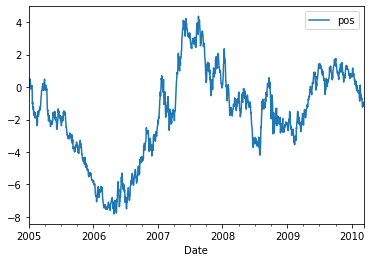

In [859]:
(np.cumsum(((-pf_long.groupby("Date")[["pos"]].sum()+pf_short.groupby("Date")[["pos"]].sum())).diff(1).fillna(0))).plot()

In [860]:
t1 = ((((-pf_long.groupby("Date")[["pos"]].sum()+pf_short.groupby("Date")[["pos"]].sum())).diff(1).fillna(0)))

In [861]:
np.mean(t1)/np.std(t1)

pos   -0.002699
dtype: float64

In [862]:
pf = ((((tmp2.groupby("Date")[["pos"]].sum()-pf_short.groupby("Date")[["pos"]].sum())).diff(1).fillna(0))).rename(columns={"pos":"pnl"})

In [863]:
np.mean(pf)/np.std(pf)

pnl    0.022936
dtype: float64

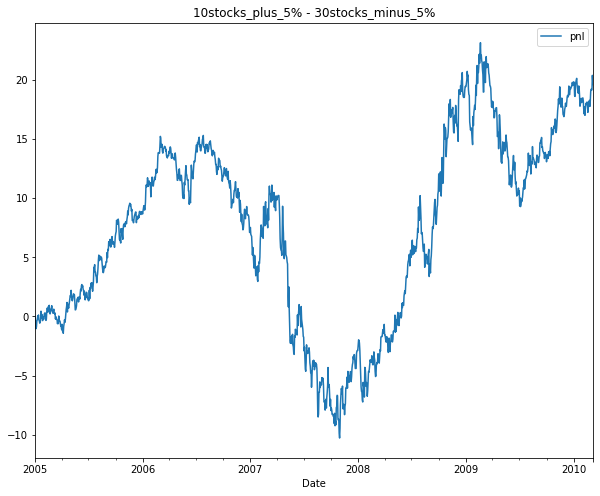

In [867]:
_,ax = plt.subplots(figsize=(10,8))
np.cumsum(pf).plot(ax=ax)
plt.title("10stocks_plus_5% - 30stocks_minus_5%")
plt.savefig("fig/longshort.png")

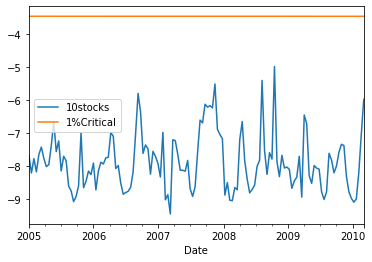

In [871]:
general_pf_res[1][5][general_pf_res[1][5].rebalance].groupby("Date")[["ADF","1%Critical"]].first().rename(columns={"ADF":str(10)+"stocks"}).plot()


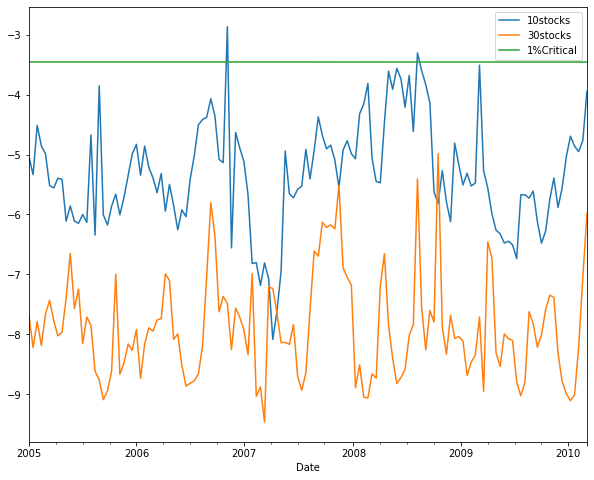

In [875]:
_,ax = plt.subplots(figsize=(10,8))
tmp2[tmp2.rebalance].groupby("Date")[["ADF"]].first().rename(columns={"ADF":str(10)+"stocks"}).plot(ax=ax)
general_pf_res[1][5][general_pf_res[1][5].rebalance].groupby("Date")[["ADF","1%Critical"]].first().rename(columns={"ADF":str(30)+"stocks"}).plot(ax=ax)
plt.savefig("fig/lshortADF.png")


In [876]:
df_cac40 = df_price["CAC 40"].reset_index()
df_cac40 = df_cac40[df_cac40.Date>"2005-01-01"].reset_index(drop=True)

In [888]:
np.corrcoef((df_cac40.set_index("Date").diff(1).fillna(0))["CAC 40"],pf['pnl'])

array([[1.        , 0.20701654],
       [0.20701654, 1.        ]])

In [887]:
pf['pnl']

Date
2005-01-03    0.000000
2005-01-04   -0.792664
2005-01-05   -0.248587
2005-01-06    0.151138
2005-01-07    0.524583
                ...   
2010-03-03   -0.041873
2010-03-04   -0.009875
2010-03-05    1.224072
2010-03-08   -0.535648
2010-03-09   -0.221548
Name: pnl, Length: 1352, dtype: float64

In [892]:
np.mean(np.cumsum(df_cac40["CAC 40"]))/np.std(np.cumsum(df_cac40["CAC 40"]))

1.7124350191386621

In [901]:
np.mean(df_cac40.set_index("Date").diff(1).fillna(0))/np.std(df_cac40.set_index("Date").diff(1).fillna(0))

CAC 40    0.000588
dtype: float64

In [ ]:
df["total_return"] = df["daily_returns"].cumsum()
df["drawdown"] = df["total_returnå"] - df["total_return"].cummax()
maxdd = df["drawdown"].min()